1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [2]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

In [3]:
# Generation of the dataset
N=1000
x1= np.random.normal(0, 1,N).T
x2 = x1 + np.random.normal(0, 3,N).T
x3 = 2*x1 + x2
dataset = np.array([x1,x2,x3])

# Finding the eigenvectors and eigenvalues of the covariance matrix of the dataset
cov=np.cov(dataset)
l, V = la.eig(cov)
print("results with np.eig:")
print ("the 3 eigenvalues : " ,l)
print ("the 3 eigenvectors correspondents (one per column):\n",V)

#Findng the eigenvectors and eigenvalues using SVD.
print("\nresults with la.svd:")
U, spectrum, Vt = la.svd(cov)
print ("the 3 eigenvalues : " ,spectrum)
print ("the 3 eigenvectors correspondents (one per column):\n",Vt)

'''the difference between the two results is very small, it is around 10**-2'''



results with np.eig:
the 3 eigenvalues :  [2.62224228e+01+0.j 3.63446062e-16+0.j 1.97900999e+00+0.j]
the 3 eigenvectors correspondents (one per column):
 [[-0.12058214 -0.81649658  0.56461782]
 [-0.57093064 -0.40824829 -0.71230017]
 [-0.81209491  0.40824829  0.41693547]]

results with la.svd:
the 3 eigenvalues :  [2.62224228e+01 1.97900999e+00 8.05018438e-16]
the 3 eigenvectors correspondents (one per column):
 [[-0.12058214 -0.57093064 -0.81209491]
 [ 0.56461782 -0.71230017  0.41693547]
 [ 0.81649658  0.40824829 -0.40824829]]


'the difference between the two results is very small, it is around 10**-2'

In [25]:
# Percent of the total dataset's variability explained by the principal components
print("\ncalcul of the percent of the variability:")
Lambda=np.diag(l)
print ("\ncov.trace():", cov.trace())
print ("Lambda.trace():", Lambda.trace())
print ("variability percent :",Lambda[0,0]/Lambda.trace())

#reducing the dataset dimension
dataset_reduced = dataset[0:2,:]
cov_r=np.cov(dataset_reduced)
l_r, V_r = la.eig(cov_r)
Lambda_r=np.diag(l_r)
print ("\ncov_r.trace():", cov_r.trace())
print ("Lambda_r.trace():", Lambda_r.trace())
print ("variability percent with a reduced dataset :",Lambda_r[0,0]/Lambda_r.trace())


calcul of the percent of the variability:

cov.trace(): 28.20143282291935
Lambda.trace(): (28.20143282291938+0j)
variability percent : (0.9298259063946083+0j)

cov_r.trace(): 10.563771893659792
Lambda_r.trace(): (10.563771893659792+0j)
variability percent with a reduced dataset : (0.084675213197573+0j)


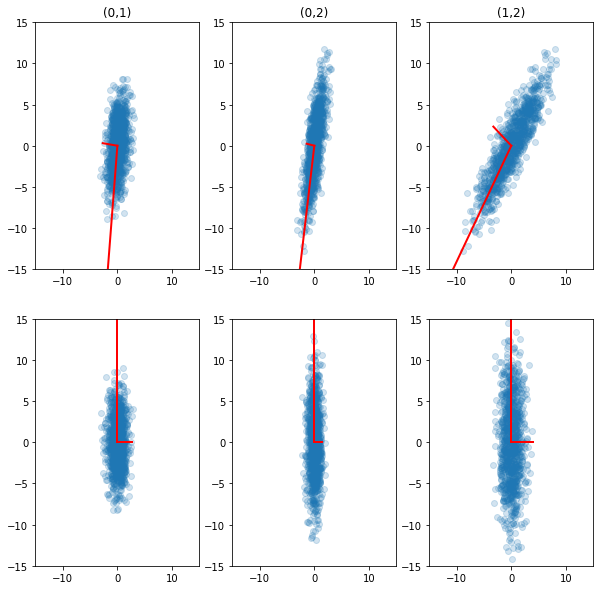

In [39]:
# Redefining the data in the basis yielded by the PCA procedure
l01, V01 = np.linalg.eig(np.dot(dataset[0:2,:], dataset[0:2,:].T)/(N-1))
# rotate all the data points accordingly to the new base
Xp01 = np.dot(V01.T, dataset[0:2,:])


# Redefining the data in the basis yielded by the PCA procedure
l02, V02 = np.linalg.eig(np.dot(dataset[0:3:2,:], dataset[0:3:2,:].T)/(N-1))
# rotate all the data points accordingly to the new base
Xp02 = np.dot(V02.T, dataset[0:3:2,:])

# Redefining the data in the basis yielded by the PCA procedure
l12, V12 = np.linalg.eig(np.dot(dataset[1:3,:], dataset[1:3,:].T)/(N-1))
# rotate all the data points accordingly to the new base
Xp12 = np.dot(V12.T, dataset[1:3,:])


# plot
# a scale factor to emphazise the lines 
scale_factor=3
fig=plt.figure(figsize=(10,10))

#(0,1)
fig.add_subplot(2, 3,1)

plt.scatter(dataset[0,:], dataset[1,:], alpha=0.2)
# draw each eigenvector
for li, vi in zip(l01, V01.T):
    # the line is defined by means of its beginning and its end 
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]] ,'r-', lw=2)

# fix the size of the axes to have the right visual effect
plt.axis([-15,15,-15,15])
plt.title('(0,1)');

# (0,2)
fig.add_subplot(2, 3,2)

plt.scatter(dataset[0,:], dataset[2,:], alpha=0.2)

# draw each eigenvector
for li, vi in zip(l02, V02.T):
    # the line is defined by means of its beginning and its end 
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

# fix the size of the axes to have the right visual effect
plt.axis([-15,15,-15,15])
plt.title('(0,2)');


# (1,2)
fig.add_subplot(2, 3,3)

plt.scatter(dataset[1,:], dataset[2,:], alpha=0.2)

# draw each eigenvector
for li, vi in zip(l12, V12.T):
    # the line is defined by means of its beginning and its end 
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

# fix the size of the axes to have the right visual effect
plt.axis([-15,15,-15,15])
plt.title('(1,2)');


# then plot the rotated dataset and its "axes"
# (0,1)
fig.add_subplot(2, 3,4)
plt.scatter(Xp01[0,:], Xp01[1,:], alpha=0.2)
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l01,  np.diag([1]*2)):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-15,15,-15,15]);

#(0,2)
fig.add_subplot(2, 3,5)
plt.scatter(Xp02[0,:], Xp02[1,:], alpha=0.2)
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l02,  np.diag([1]*2)):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-15,15,-15,15]);

#(1,2)
fig.add_subplot(2, 3,6)
plt.scatter(Xp12[0,:], Xp12[1,:], alpha=0.2)
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l12,  np.diag([1]*2)):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-15,15,-15,15]);

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

dataset with noise : 
 [[-1.05936021  0.20224658 -1.12515484 ...  0.77047129 -0.41599277
  -1.21490117]
 [ 5.02267681  6.2993527  -1.98610534 ...  3.82258882  0.22567553
  -0.19590126]
 [ 3.35763611  7.15752555 -3.78273532 ...  5.81721112 -0.15263031
  -2.17202389]]


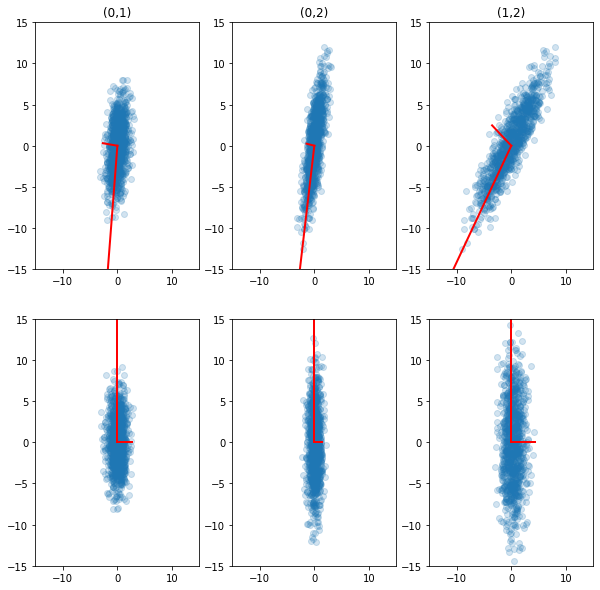

In [53]:
dataset_n = np.array([ x + np.sum(np.random.normal(0, 0.05,10)) for x in dataset ])
print ("dataset with noise : \n",dataset_n)


# Redefining the data in the basis yielded by the PCA procedure
l01, V01 = np.linalg.eig(np.dot(dataset_n[0:2,:], dataset_n[0:2,:].T)/(N-1))
# rotate all the data points accordingly to the new base
Xp01 = np.dot(V01.T, dataset_n[0:2,:])


# Redefining the data in the basis yielded by the PCA procedure
l02, V02 = np.linalg.eig(np.dot(dataset_n[0:3:2,:], dataset_n[0:3:2,:].T)/(N-1))
# rotate all the data points accordingly to the new base
Xp02 = np.dot(V02.T, dataset_n[0:3:2,:])

# Redefining the data in the basis yielded by the PCA procedure
l12, V12 = np.linalg.eig(np.dot(dataset_n[1:3,:], dataset_n[1:3,:].T)/(N-1))
# rotate all the data points accordingly to the new base
Xp12 = np.dot(V12.T, dataset_n[1:3,:])


# plot
# a scale factor to emphazise the lines 
scale_factor=3
fig=plt.figure(figsize=(10,10))

#(0,1)
fig.add_subplot(2, 3,1)

plt.scatter(dataset_n[0,:], dataset_n[1,:], alpha=0.2)
# draw each eigenvector
for li, vi in zip(l01, V01.T):
    # the line is defined by means of its beginning and its end 
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]] ,'r-', lw=2)

# fix the size of the axes to have the right visual effect
plt.axis([-15,15,-15,15])
plt.title('(0,1)');

# (0,2)
fig.add_subplot(2, 3,2)

plt.scatter(dataset_n[0,:], dataset_n[2,:], alpha=0.2)

# draw each eigenvector
for li, vi in zip(l02, V02.T):
    # the line is defined by means of its beginning and its end 
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

# fix the size of the axes to have the right visual effect
plt.axis([-15,15,-15,15])
plt.title('(0,2)');


# (1,2)
fig.add_subplot(2, 3,3)

plt.scatter(dataset_n[1,:], dataset_n[2,:], alpha=0.2)

# draw each eigenvector
for li, vi in zip(l12, V12.T):
    # the line is defined by means of its beginning and its end 
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

# fix the size of the axes to have the right visual effect
plt.axis([-15,15,-15,15])
plt.title('(1,2)');


# then plot the rotated dataset and its "axes"
# (0,1)
fig.add_subplot(2, 3,4)
plt.scatter(Xp01[0,:], Xp01[1,:], alpha=0.2)
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l01,  np.diag([1]*2)):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-15,15,-15,15]);

#(0,2)
fig.add_subplot(2, 3,5)
plt.scatter(Xp02[0,:], Xp02[1,:], alpha=0.2)
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l02,  np.diag([1]*2)):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-15,15,-15,15]);

#(1,2)
fig.add_subplot(2, 3,6)
plt.scatter(Xp12[0,:], Xp12[1,:], alpha=0.2)
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l12,  np.diag([1]*2)):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-15,15,-15,15]);


#It is the same result

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 